In [47]:
import pandas as pd
import numpy as np
heart_df=pd.read_csv('heartdisease.csv')


In [48]:
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,predicted
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [49]:
heart_df.dtypes

age           int64
sex           int64
cp            int64
trestbps     object
chol         object
fbs          object
restecg       int64
thalach      object
exang        object
oldpeak      object
slope        object
ca           object
thal         object
predicted     int64
dtype: object

In [50]:
heart=heart_df.replace('?',np.nan)

In [51]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,predicted
0,63,1,4,140,260,0,1,112,1,3,2,NaN,NaN,2
1,44,1,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,NaN,NaN,2
3,55,1,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1
4,66,1,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0


In [52]:
# Let us replace NaN values with most_frequent
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent')
list1=['chol','fbs','exang','oldpeak','slope','ca','thal','trestbps','thalach']
for val in list1:
    heart[val]=imp.fit_transform(heart[val].values.reshape(-1,1))

In [53]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['trestbps','chol','fbs','thalach','exang','oldpeak','slope','ca','thal']
for val in list1:
    heart[val]=le.fit_transform(heart[val].astype(float))

In [54]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,predicted
0,63,1,4,24,62,0,1,20,1,11,1,0,2,2
1,44,1,4,18,28,0,1,33,0,1,1,0,2,0
2,60,1,4,19,35,0,1,42,1,6,2,0,2,2
3,55,1,4,25,45,0,1,47,1,10,0,0,2,1
4,66,1,3,6,31,1,2,11,1,5,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,16,91,1,1,50,0,1,1,0,2,1
196,62,1,1,11,2,0,1,26,1,1,1,0,2,0
197,55,1,4,12,40,1,1,12,0,1,1,0,1,2
198,58,1,4,11,97,1,2,26,1,1,1,0,2,0


In [55]:
heart.dtypes

age          int64
sex          int64
cp           int64
trestbps     int64
chol         int64
fbs          int64
restecg      int64
thalach      int64
exang        int64
oldpeak      int64
slope        int64
ca           int64
thal         int64
predicted    int64
dtype: object

In [56]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,predicted
0,63,1,4,24,62,0,1,20,1,11,1,0,2,2
1,44,1,4,18,28,0,1,33,0,1,1,0,2,0
2,60,1,4,19,35,0,1,42,1,6,2,0,2,2
3,55,1,4,25,45,0,1,47,1,10,0,0,2,1
4,66,1,3,6,31,1,2,11,1,5,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,16,91,1,1,50,0,1,1,0,2,1
196,62,1,1,11,2,0,1,26,1,1,1,0,2,0
197,55,1,4,12,40,1,1,12,0,1,1,0,1,2
198,58,1,4,11,97,1,2,26,1,1,1,0,2,0


In [57]:
import seaborn as sns

#     checking for the missing values

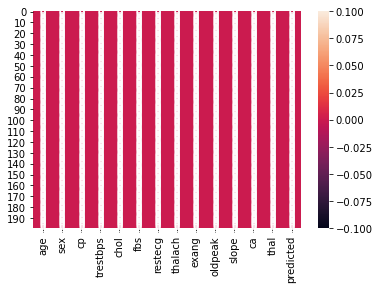

In [58]:
sns.heatmap(heart.isnull(),annot=True)

Observed:
    1.we observed that there are no null values

In [59]:
heart.skew()

age         -0.404091
sex         -5.552105
cp          -1.648734
trestbps     0.673163
chol         0.413457
fbs          0.680636
restecg      0.391463
thalach      0.263515
exang       -1.102593
oldpeak      0.693752
slope        0.210521
ca           0.000000
thal        -4.532132
predicted    0.297393
dtype: float64

In [60]:
for col in heart.columns:
    if heart.skew().loc[col]>0.55:
        heart[col]=np.log1p(heart[col])

In [61]:
heart.skew()

age         -0.404091
sex         -5.552105
cp          -1.648734
trestbps    -0.936634
chol         0.413457
fbs          0.680636
restecg      0.391463
thalach      0.263515
exang       -1.102593
oldpeak      0.295929
slope        0.210521
ca           0.000000
thal        -4.532132
predicted    0.297393
dtype: float64

# To check the correlation

In [62]:
heart.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,predicted
age,1.000000,0.034230,-0.038280,0.169464,0.049327,0.135728,0.002400,-0.139150,0.129027,0.098211,0.107135,NaN,0.092525,0.287289
sex,0.034230,1.000000,0.038036,-0.030633,-0.162399,-0.059400,0.060621,0.003077,0.029402,0.042951,0.086709,NaN,-0.041742,0.147470
cp,-0.038280,0.038036,1.000000,0.137633,0.078455,-0.044416,0.034790,-0.088056,0.089904,0.211203,0.059460,NaN,-0.017195,0.168210
trestbps,0.169464,-0.030633,0.137633,1.000000,0.085050,0.157761,0.006483,0.103497,0.076372,0.269000,0.083025,NaN,-0.016141,0.172509
chol,0.049327,-0.162399,0.078455,0.085050,1.000000,0.146351,-0.024385,-0.009424,0.124144,-0.032637,0.037671,NaN,-0.059983,0.114671
fbs,0.135728,-0.059400,-0.044416,0.157761,0.146351,1.000000,0.170616,0.028425,-0.176144,-0.133427,-0.009435,NaN,-0.080170,0.048940
restecg,0.002400,0.060621,0.034790,0.006483,-0.024385,0.170616,1.000000,-0.000880,-0.063203,-0.127435,-0.039881,NaN,-0.005222,-0.032800
thalach,-0.139150,0.003077,-0.088056,0.103497,-0.009424,0.028425,-0.000880,1.000000,-0.093002,0.150829,-0.084516,NaN,-0.223604,-0.062714
exang,0.129027,0.029402,0.089904,0.076372,0.124144,-0.176144,-0.063203,-0.093002,1.000000,0.074954,0.106259,NaN,0.197511,0.206541
oldpeak,0.098211,0.042951,0.211203,0.269000,-0.032637,-0.133427,-0.127435,0.150829,0.074954,1.000000,0.250282,NaN,0.080110,0.343623


In [63]:
import matplotlib.pyplot as plt

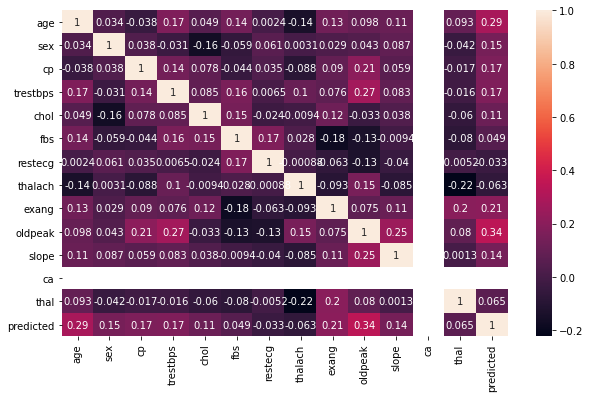

In [64]:
plt.figure(figsize=(10,6))
sns.heatmap(heart.corr(),annot=True)

Observed:
    1.from above map the average price is highly correlated

In [65]:
heart=heart.drop(['thalach','thal','restecg','ca'],axis=1)

# To Check the Distribution of skewness

In [66]:
col=heart.columns.values
ncol=5
nrow=5

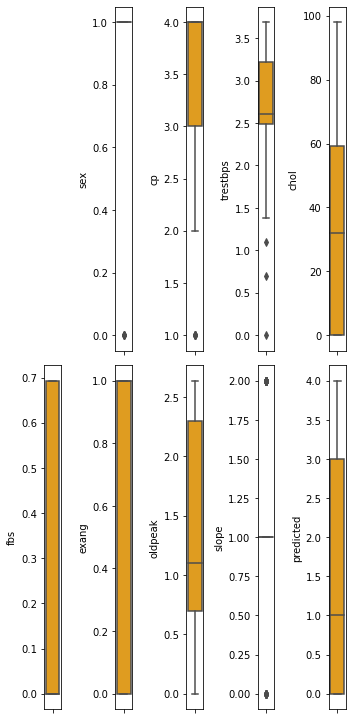

In [67]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(col)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(heart[col[i]],color='orange',orient='v')
    plt.tight_layout()

In [68]:
from scipy.stats import zscore
z_score=abs(zscore(heart))
print(heart.shape)
hea=heart.loc[(z_score<3).all(axis=1)]
print(hea.shape)

(200, 10)
(182, 10)


In [69]:
hea

,age,sex,cp,trestbps,chol,fbs,exang,oldpeak,slope,predicted
0,63,1,4,3.218876,62,0.000000,1,2.484907,1,2
1,44,1,4,2.944439,28,0.000000,0,0.693147,1,0
2,60,1,4,2.995732,35,0.000000,1,1.945910,2,2
3,55,1,4,3.258097,45,0.000000,1,2.397895,0,1
4,66,1,3,1.945910,31,0.693147,1,1.791759,1,0
...,...,...,...,...,...,...,...,...,...,...
193,62,1,4,3.526361,9,0.000000,1,0.693147,1,1
194,46,1,4,3.044522,87,0.000000,0,0.693147,1,2
197,55,1,4,2.564949,40,0.693147,0,0.693147,1,2
198,58,1,4,2.484907,97,0.693147,1,0.693147,1,0


In [70]:
hea=pd.DataFrame(data=hea)

In [71]:
df_x=hea.drop(['predicted'],axis=1)

In [72]:
df_x

,age,sex,cp,trestbps,chol,fbs,exang,oldpeak,slope
0,63,1,4,3.218876,62,0.000000,1,2.484907,1
1,44,1,4,2.944439,28,0.000000,0,0.693147,1
2,60,1,4,2.995732,35,0.000000,1,1.945910,2
3,55,1,4,3.258097,45,0.000000,1,2.397895,0
4,66,1,3,1.945910,31,0.693147,1,1.791759,1
...,...,...,...,...,...,...,...,...,...
193,62,1,4,3.526361,9,0.000000,1,0.693147,1
194,46,1,4,3.044522,87,0.000000,0,0.693147,1
197,55,1,4,2.564949,40,0.693147,0,0.693147,1
198,58,1,4,2.484907,97,0.693147,1,0.693147,1


In [73]:
df_x.shape

(182, 9)

In [74]:
y=pd.DataFrame(hea['predicted'])

In [75]:
y

,predicted
0,2
1,0
2,2
3,1
4,0
...,...
193,1
194,2
197,2
198,0


In [76]:
y.shape

(182, 1)

In [77]:
#scaling the input variable
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
svc=svm.SVC()
parameters={'kernel':['linear','rbf','poly'],'C':[1.0]}
gd=GridSearchCV(svc,parameters)
gd.fit(x,y)
sorted(gd.cv_results_.keys())
print(gd.best_params_)

{'C': 1.0, 'kernel': 'rbf'}


In [80]:
dtc=DecisionTreeClassifier()
parameters={'criterion':['gini','entropy']}
gd=GridSearchCV(dtc,parameters)
gd.fit(x,y)
sorted(gd.cv_results_.keys())
print(gd.best_params_)

{'criterion': 'entropy'}


In [81]:
model=[DecisionTreeClassifier(criterion='gini'),KNeighborsClassifier(),SVC(kernel='rbf'),RandomForestClassifier(),AdaBoostClassifier()]
for m in model:
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=61,test_size=.20)
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Score:')
    print('accuracy_score :',accuracy_score(y_test,predm))
    print('confusion_matrix :',confusion_matrix(y_test,predm))
    print('classification_report',classification_report(y_test,predm))
    print('*******************************************************************************************************')
    print('\n')

Score of DecisionTreeClassifier() is: 0.993103448275862
Score:
accuracy_score : 0.35135135135135137
confusion_matrix : [[3 0 0 3 1]
 [3 4 2 4 0]
 [1 0 2 2 1]
 [0 2 2 4 0]
 [1 1 1 0 0]]
classification_report               precision    recall  f1-score   support

           0       0.38      0.43      0.40         7
           1       0.57      0.31      0.40        13
           2       0.29      0.33      0.31         6
           3       0.31      0.50      0.38         8
           4       0.00      0.00      0.00         3

    accuracy                           0.35        37
   macro avg       0.31      0.31      0.30        37
weighted avg       0.38      0.35      0.35        37

*******************************************************************************************************


Score of KNeighborsClassifier() is: 0.5241379310344828
Score:
accuracy_score : 0.40540540540540543
confusion_matrix : [[3 1 1 2 0]
 [6 5 1 1 0]
 [2 0 4 0 0]
 [2 3 0 3 0]
 [0 1 1 1 0]]
classification

Oserved:
    1.we have completed our project

In [82]:
import joblib
joblib.dump(RandomForestClassifier,'heartdisease.pkl')

['heartdisease.pkl']

Observed:
    1.RandomForestClassifier is the best model and we get accuracy score is 90 percent